In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Diabetes_Data.csv')
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
data.shape

(768, 10)

In [4]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [5]:
data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

In [6]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

<AxesSubplot:>

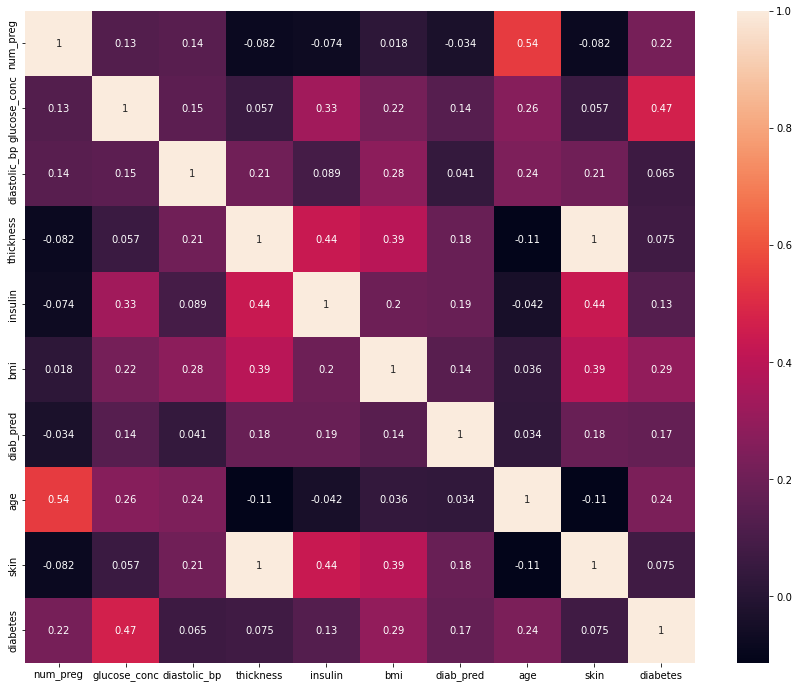

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [8]:
pd.get_dummies(data['diabetes'],drop_first=True)

,True
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [9]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [10]:
data['Diabetes'] = pd.get_dummies(data['diabetes'],drop_first="True")

In [11]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,False,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,True,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,False,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,True,1


In [12]:
data.drop('diabetes',axis =1 , inplace= True)

In [13]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [14]:
data['Diabetes'].value_counts()

0    500
1    268
Name: Diabetes, dtype: int64

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

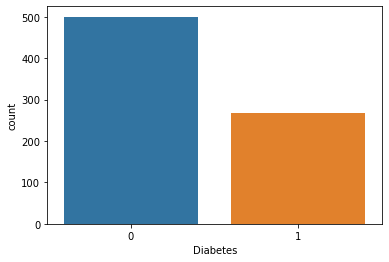

In [15]:
sns.countplot(x='Diabetes',data=data)

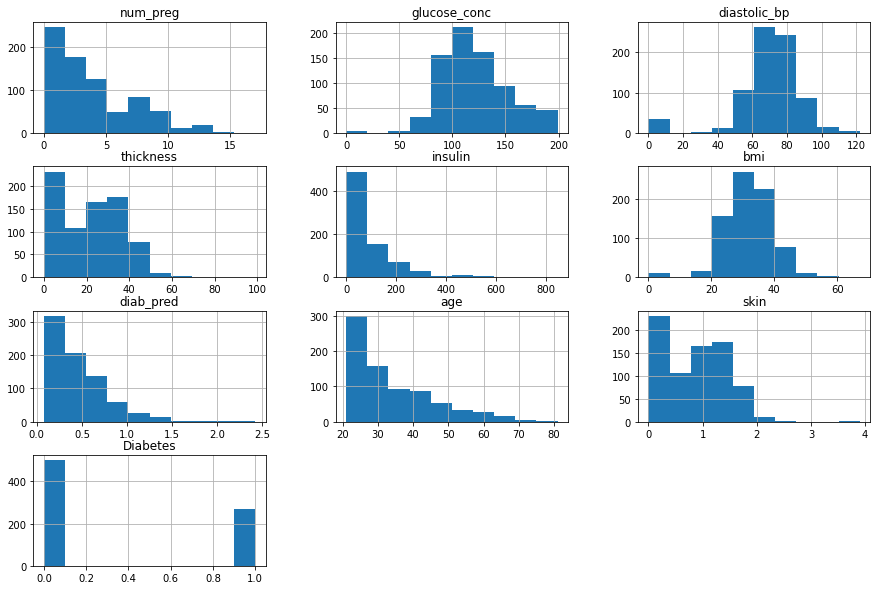

In [16]:
data.hist(figsize = (15,10));

In [17]:
new_data = data
new_data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [18]:
from sklearn.model_selection import train_test_split
features = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','skin']
prediction = ['Diabetes']

In [19]:
X = new_data[features]
y = new_data[prediction]

In [20]:
X.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790


In [21]:
y.head(5)

,Diabetes
0,1
1,0
2,1
3,0
4,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
for feature in features:
    print("Number of zeroes in" , feature, "is", (new_data[feature] == 0).sum())

Number of zeroes in num_preg is 111
Number of zeroes in glucose_conc is 5
Number of zeroes in diastolic_bp is 35
Number of zeroes in thickness is 227
Number of zeroes in insulin is 374
Number of zeroes in bmi is 11
Number of zeroes in diab_pred is 0
Number of zeroes in age is 0
Number of zeroes in skin is 227


In [24]:
for feature in features:
    mean = new_data[feature].mean()
    new_data[feature] = new_data[feature].replace(0,mean)

In [25]:
for feature in features:
    print("Number of zeroes in" , feature, "is", (new_data[feature] == 0).sum())

Number of zeroes in num_preg is 0
Number of zeroes in glucose_conc is 0
Number of zeroes in diastolic_bp is 0
Number of zeroes in thickness is 0
Number of zeroes in insulin is 0
Number of zeroes in bmi is 0
Number of zeroes in diab_pred is 0
Number of zeroes in age is 0
Number of zeroes in skin is 0


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

In [27]:
m1.fit(X_train,y_train)

C:\Users\vaish\OneDrive\Desktop\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vaish\OneDrive\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print("Training Score ",m1.score(X_train,y_train))
print("Testing Score ",m1.score(X_test,y_test))

Training Score  0.7801302931596091
Testing Score  0.7597402597402597


In [29]:
y_pred = m1.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print(accuracy_score(y_test,y_pred))

0.7597402597402597


## KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors=9)
m2.fit(X_train,y_train)


C:\Users\vaish\OneDrive\Desktop\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [33]:
y_pred_m2 = m2.predict(X_test)

In [34]:
print(accuracy_score(y_pred_m2,y_test))

0.7467532467532467


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[87 17]
 [20 30]]
